In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, datasets, preprocessing,model_selection
import matplotlib.pyplot as plt
import seaborn as sn
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Grade_Set_1_Classification.csv")

independent_variables = ['Hours_Studied']
dependent_variables = ['Result']

x = df[independent_variables]
#X=np.expand_dims(X,1)
y = df[dependent_variables]


# instantiate logit model
model = LogisticRegression()
model = model.fit(x, y.values.ravel())

FileNotFoundError: [Errno 2] No such file or directory: 'Grade_Set_1_Classification.csv'

In [ ]:
# check the accuracy
print(model.score(x, y))

# predict probability
print ("Predict probability : ", model.predict_proba(x)[:, 1])
# predict outcome (y=1 or y=0)
print ("Predicted class : ", model.predict(x))
# plot fitted line
plt.scatter(df. Hours_Studied , y)
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df. Hours_Studied , model . predict_proba(x)[:, 1], color ="red")
plt.title("Hours studied vs Result")
plt.ylabel("Result")
plt.xlabel("Hours Studied")
plt.show()

In [ ]:
# generate evaluation metrics
print("Train accuracy : ", metrics.accuracy_score (y,model.predict(x)))
print ("Train confusion matrix \n",metrics.confusion_matrix(y,model.predict(x)))
print ("Classification report : \n", metrics.classification_report(y,model.
predict (x)))


Iris

In [ ]:
iris = datasets.load_iris()

x = iris.data
y = iris.target
print ('Class labels : ', np. unique (y))


In [ ]:
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target
iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [ ]:
#Missing values or 0
for linhas in x:
    for elem in linhas:
        if elem == 0 or elem is None:
            print(elem)


In [ ]:
iris_df.dropna(how="all", inplace=True) # remove any empty lines

In [ ]:
independent_variables =  ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']
dependent_variables = ['class']

In [ ]:
corr_matrix = iris_df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

thresh = 10
for i in np.arange(0, len(iris_df)):
    vif = [variance_inflation_factor(iris_df[independent_variables].values,ix)
        for ix in range(iris_df[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('vif :', vif)
        print('dropping', iris_df[independent_variables].columns[maxloc],
              'at index', maxloc)
        del independent_variables[maxloc]
    else:
        break

print('Final variables :',independent_variables)

In [ ]:
"""
normalize data
sc = preprocessing.StandardScaler()
sc.fit(x)
x = sc.transform(x)
"""

In [ ]:
# split into train test
x_train , x_test , y_train , y_test = model_selection.train_test_split(iris_df[independent_variables], 
                                                                       iris_df[dependent_variables], 
                                                                       test_size =.2,random_state =0)

# Logistic Regression without regularization

In [ ]:
lr = LogisticRegression ()
# l1 - lasso regularization ; l2 - ridge regularization
# C - inverse of regularization strength
lr.fit(x_train,y_train.values.ravel() )
from sklearn import metrics
# generate evaluation metrics
print ('Train accuracy : ', metrics.accuracy_score (y_train,lr.predict( x_train)))
print ('Train confusion matrix \n', metrics.confusion_matrix (y_train,lr.predict(x_train)))
print ('Classification report : \n',metrics.classification_report(y_train,lr.predict(x_train)))
print ('Test accuracy : ', metrics.accuracy_score(y_test,lr.predict(x_test)))
print ('Test confusion matrix \n', metrics.confusion_matrix (y_test, lr.predict(x_test)))
print ('Classification report : \n',metrics.classification_report(y_test,lr.predict(x_test)))

In [3]:
lr = LogisticRegression (penalty ='l2', C=10 , random_state =0)
# l1 - lasso regularization ; l2 - ridge regularization
# C - inverse of regularization strength
lr.fit(x_train, y_train.values.ravel() )
from sklearn import metrics
# generate evaluation metrics
print ('Train accuracy : ', metrics.accuracy_score (y_train,lr.predict( x_train)))
print ('Train confusion matrix \n', metrics.confusion_matrix (y_train,lr.predict(x_train)))
print ('Classification report : \n',metrics.classification_report(y_train,lr.predict(x_train)))
print ('Test accuracy : ', metrics.accuracy_score(y_test,lr.predict(x_test)))
print ('Test confusion matrix \n', metrics.confusion_matrix (y_test, lr.predict(x_test)))
print ('Classification report : \n',metrics.classification_report(y_test,lr.predict(x_test)))

NameError: name 'x_train' is not defined

# Valores ao quadrado

In [158]:
iris_df_2 = iris_df

iris_df_2.insert(1, "sepal_len_2", iris_df_2['sepal_len']**2, True)
iris_df_2.insert(3, "sepal_wid_2", iris_df_2['sepal_wid']**2, True)
iris_df_2.insert(5, "petal_len_2", iris_df_2['petal_len']**2, True)
iris_df_2.insert(7, "petal_wid_2", iris_df_2['petal_wid']**2, True)

In [159]:
print(iris_df_2)

     sepal_len  sepal_len_2  sepal_wid  sepal_wid_2  petal_len  petal_len_2  \
0          5.1        26.01        3.5        12.25        1.4         1.96   
1          4.9        24.01        3.0         9.00        1.4         1.96   
2          4.7        22.09        3.2        10.24        1.3         1.69   
3          4.6        21.16        3.1         9.61        1.5         2.25   
4          5.0        25.00        3.6        12.96        1.4         1.96   
..         ...          ...        ...          ...        ...          ...   
145        6.7        44.89        3.0         9.00        5.2        27.04   
146        6.3        39.69        2.5         6.25        5.0        25.00   
147        6.5        42.25        3.0         9.00        5.2        27.04   
148        6.2        38.44        3.4        11.56        5.4        29.16   
149        5.9        34.81        3.0         9.00        5.1        26.01   

     petal_wid  petal_wid_2  class  
0          0.2

In [160]:
independent_variables =  ['sepal_len','sepal_len_2', 'sepal_wid','sepal_wid_2', 'petal_len','petal_len_2',
                          'petal_wid','petal_wid_2']
dependent_variables = ['class']
print(iris_df_2)

     sepal_len  sepal_len_2  sepal_wid  sepal_wid_2  petal_len  petal_len_2  \
0          5.1        26.01        3.5        12.25        1.4         1.96   
1          4.9        24.01        3.0         9.00        1.4         1.96   
2          4.7        22.09        3.2        10.24        1.3         1.69   
3          4.6        21.16        3.1         9.61        1.5         2.25   
4          5.0        25.00        3.6        12.96        1.4         1.96   
..         ...          ...        ...          ...        ...          ...   
145        6.7        44.89        3.0         9.00        5.2        27.04   
146        6.3        39.69        2.5         6.25        5.0        25.00   
147        6.5        42.25        3.0         9.00        5.2        27.04   
148        6.2        38.44        3.4        11.56        5.4        29.16   
149        5.9        34.81        3.0         9.00        5.1        26.01   

     petal_wid  petal_wid_2  class  
0          0.2

In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

thresh = 10
for i in np.arange(0, len(iris_df_2)):
    vif = [variance_inflation_factor(iris_df_2[independent_variables].values,ix)
        for ix in range(iris_df_2[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('vif :', vif)
        print('dropping', iris_df_2[independent_variables].columns[maxloc],
              'at index', maxloc)
        del independent_variables[maxloc]
    else:
        break

print('Final variables :',independent_variables)

vif : [5163.254626564767, 1455.3909503058974, 3777.2878805368814, 951.6648253995239, 1451.9584542614484, 446.3040427619074, 588.6228287582092, 166.37873087498343]
dropping sepal_len at index 0
vif : [99.26258713326521, 486.1838129771048, 211.20221319706795, 1214.9991104608523, 349.12715654784137, 586.6195600517759, 166.23766482478638]
dropping petal_len at index 3
vif : [99.24582052355282, 204.34307755564691, 119.28886881595567, 61.6087936518472, 109.46534083674025, 46.65125693306431]
dropping sepal_wid at index 1
vif : [82.39339459878727, 20.980449128399744, 53.382718163387004, 70.65377958691404, 36.09490217596683]
dropping sepal_len_2 at index 0
vif : [3.018698876920845, 27.08307564006324, 57.9701813770677, 24.23036603411758]
dropping petal_wid at index 2
vif : [2.089233175198542, 14.640524560166142, 12.77559767078637]
dropping petal_len_2 at index 1
Final variables : ['sepal_wid_2', 'petal_wid_2']


In [162]:
# split into train test
x_train , x_test , y_train , y_test = model_selection.train_test_split(iris_df_2[independent_variables], 
                                                                       iris_df_2[dependent_variables], 
                                                                       test_size =.2,random_state =0)

In [163]:
lr = LogisticRegression ()
# l1 - lasso regularization ; l2 - ridge regularization
# C - inverse of regularization strength
lr.fit(x_train,y_train.values.ravel() )
from sklearn import metrics
# generate evaluation metrics
print ('Train accuracy : ', metrics.accuracy_score (y_train,lr.predict( x_train)))
print ('Train confusion matrix \n', metrics.confusion_matrix (y_train,lr.predict(x_train)))
print ('Classification report : \n',metrics.classification_report(y_train,lr.predict(x_train)))
print ('Test accuracy : ', metrics.accuracy_score(y_test,lr.predict(x_test)))
print ('Test confusion matrix \n', metrics.confusion_matrix (y_test, lr.predict(x_test)))
print ('Classification report : \n',metrics.classification_report(y_test,lr.predict(x_test)))

Train accuracy :  0.95
Train confusion matrix 
 [[38  1  0]
 [ 0 35  2]
 [ 0  3 41]]
Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.90      0.95      0.92        37
           2       0.95      0.93      0.94        44

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

Test accuracy :  0.9666666666666667
Test confusion matrix 
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [164]:
lr = LogisticRegression (penalty ='l2', C=10 , random_state =0)
# l1 - lasso regularization ; l2 - ridge regularization
# C - inverse of regularization strength
lr.fit(x_train, y_train.values.ravel() )
from sklearn import metrics
# generate evaluation metrics
print ('Train accuracy : ', metrics.accuracy_score (y_train,lr.predict( x_train)))
print ('Train confusion matrix \n', metrics.confusion_matrix (y_train,lr.predict(x_train)))
print ('Classification report : \n',metrics.classification_report(y_train,lr.predict(x_train)))
print ('Test accuracy : ', metrics.accuracy_score(y_test,lr.predict(x_test)))
print ('Test confusion matrix \n', metrics.confusion_matrix (y_test, lr.predict(x_test)))
print ('Classification report : \n',metrics.classification_report(y_test,lr.predict(x_test)))

Train accuracy :  0.9583333333333334
Train confusion matrix 
 [[39  0  0]
 [ 0 35  2]
 [ 0  3 41]]
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.92      0.95      0.93        37
           2       0.95      0.93      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

Test accuracy :  0.9666666666666667
Test confusion matrix 
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97  

# Score Exams Admission

In [4]:
df_exams = pd.read_csv("Score_Exams_Admission.csv")
df_exams.head()
df_exams.dtypes

score_exam_1    float64
score_exam_2    float64
admission         int64
dtype: object

Verificar se os tipos são numéricos e se tem valores negativos

In [5]:
print(df_exams.dtypes)
print(df_exams.isnull().sum())

score_exam_1    float64
score_exam_2    float64
admission         int64
dtype: object
score_exam_1    0
score_exam_2    0
admission       0
dtype: int64


In [6]:
print(df_exams.score_exam_1.unique())

[34.62365962 30.28671077 35.84740877 60.18259939 79.03273605 45.08327748
 61.10666454 75.02474557 76.0987867  84.43281996 95.86155507 75.01365839
 82.30705337 69.36458876 39.53833914 53.97105215 69.07014406 67.94685548
 70.66150955 76.97878373 67.37202755 89.67677575 50.53478829 34.21206098
 77.92409145 62.27101367 80.19018075 93.1143888  61.83020602 38.7858038
 61.37928945 85.40451939 52.10797973 52.04540477 40.23689374 54.63510555
 33.91550011 64.17698887 74.78925296 34.18364003 83.90239366 51.54772027
 94.44336777 82.36875376 51.04775177 62.22267576 77.19303493 97.77159928
 62.0730638  91.5649745  79.94481794 99.27252693 90.54671411 34.52451385
 50.28649612 49.58667722 97.64563396 32.57720017 74.24869137 71.79646206
 75.39561147 35.28611282 56.2538175  30.05882245 44.66826172 66.56089447
 40.45755098 49.07256322 80.27957401 66.74671857 32.72283304 64.03932042
 72.34649423 60.45788574 58.84095622 99.8278578  47.26426911 50.4581598
 60.45555629 82.22666158 88.91389642 94.83450672 67.3

In [7]:
print(df_exams.score_exam_2.unique())

[78.02469282 43.89499752 72.90219803 86.3085521  75.34437644 56.31637178
 96.51142588 46.55401354 87.42056972 43.53339331 38.22527806 30.60326323
 76.4819633  97.71869196 76.03681085 89.20735014 52.74046973 46.67857411
 92.92713789 47.57596365 42.83843832 65.79936593 48.85581153 44.2095286
 68.97235999 69.95445795 44.82162893 38.80067034 50.25610789 64.99568096
 72.80788731 57.05198398 63.12762377 69.43286012 71.16774802 52.21388588
 98.86943574 80.90806059 41.57341523 75.23772034 56.30804622 46.85629026
 65.56892161 40.61825516 45.82270146 52.06099195 70.4582     86.72782233
 96.76882412 88.69629255 74.16311935 60.999031   43.39060181 60.39634246
 49.80453881 59.80895099 68.86157272 95.59854761 69.82457123 78.45356225
 85.75993667 47.02051395 39.26147251 49.59297387 66.45008615 41.09209808
 97.53518549 51.88321182 92.11606081 60.99139403 43.30717306 78.03168802
 96.22759297 73.0949981  75.85844831 72.36925193 88.475865   75.80985953
 42.50840944 42.71987854 69.8037889  45.6943068  66.

In [8]:
print(df_exams.admission.unique())

[0 1]


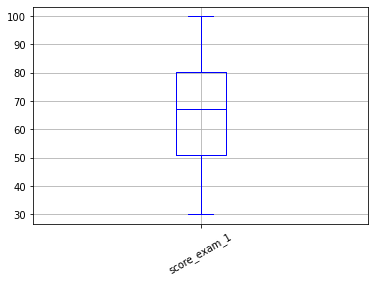

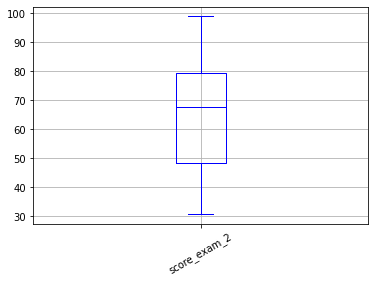

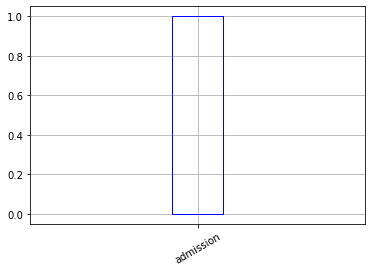

In [9]:
for column in df_exams:
    plt.figure()
    df_exams.boxplot([column],grid='true', color='blue',fontsize=10, rot=30)
plt.show()

In [10]:
# instantiate logit model
independent_variables = ['score_exam_1','score_exam_2']
dependent_variables = ['admission']

x = df_exams[independent_variables]
#X=np.expand_dims(X,1)
y = df_exams[dependent_variables]

model = LogisticRegression()
model = model.fit(x, y.values.ravel())

In [11]:
# check the accuracy
print(model.score(x, y))

# predict probability
print ("Predict probability : ", model.predict_proba(x)[:, 1])
# predict outcome (y=1 or y=0)
print ("Predicted class : ", model.predict(x))

0.89
Predict probability :  [9.18239681e-02 4.41425284e-05 4.44572493e-02 9.90230737e-01
 9.98149467e-01 1.10090385e-02 9.98946927e-01 4.23722152e-01
 9.99699637e-01 7.34698796e-01 9.08944908e-01 2.90501560e-02
 9.99247237e-01 9.99848224e-01 1.56956717e-01 9.80632040e-01
 4.28146911e-01 1.49820875e-01 9.99695998e-01 5.74135936e-01
 6.75895689e-02 9.98588459e-01 7.57768036e-03 1.05271459e-04
 9.91712132e-01 8.54108704e-01 6.00067703e-01 8.64372311e-01
 9.32573901e-02 1.71197103e-02 8.96267965e-01 9.80730013e-01
 1.55883099e-01 3.92382984e-01 7.48650994e-02 3.35904473e-02
 8.51210756e-01 9.87329324e-01 2.05070616e-01 5.01661489e-02
 9.69882182e-01 6.25560208e-03 9.99444052e-01 5.02499775e-01
 4.59585146e-03 1.38015746e-01 9.92843482e-01 9.99995971e-01
 9.99179745e-01 9.99990288e-01 9.98055470e-01 9.99484226e-01
 9.04259186e-01 2.87768723e-03 8.70055101e-03 5.35238463e-02
 9.99851137e-01 6.92794235e-01 9.85237877e-01 9.95627668e-01
 9.99515893e-01 2.30630510e-04 3.59367460e-03 1.32086830e

In [12]:
# generate evaluation metrics
print("Train accuracy : ", metrics.accuracy_score (y,model.predict(x)))
print ("Train confusion matrix \n",metrics.confusion_matrix(y,model.predict(x)))
print ("Classification report : \n", metrics.classification_report(y,model.predict (x)))
print('F1 score : \n',metrics.f1_score(y, model.predict (x), average=None))

Train accuracy :  0.89
Train confusion matrix 
 [[34  6]
 [ 5 55]]
Classification report : 
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100

F1 score : 
 [0.86075949 0.90909091]


In [13]:
print(model.predict([[50, 75]]))

[1]


Ou seja, um aluno com 50 no primeiro e 75 no segundo teste, seria aprovado

In [14]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [1]:
a = [[0.9940824]]

In [6]:
print(type(a[0]))

<class 'list'>


In [10]:
print(round(a[0][0]))

1
